# HW 6

## Question 1

In [165]:
import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support
from astropy.constants import G, M_sun
import matplotlib.pyplot as plt
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

$$\tau_{\rm{mix}} 
        = \left( \frac{8 \bar{R}^3}{G M} \right)^{1/2}$$

In [166]:
def mix(M, R, N):
    tmix = (8 * R**3 / (G * M))**0.5
    return tmix.cgs

$$\tau_{\rm{rel}}
        = \frac{1}{3(32G)^{1/2}} \frac{1}{\ln(N^{2/3} / 2)} \left( \frac{N^2 \bar{R}^3}{M} \right)^{1/2}$$

In [167]:
def rel(M, R, N):
    first = 1 / (3 * (32 * G)**0.5)
    second = 1 / (np.log(N**(2/3) / 2))
    third = (N**2 * R**3 / M)**0.5
    trel = first * second * third
    return trel.cgs

$$\tau_{\rm{evap}} \approx 135~\tau_{\rm{rel}}$$

In [168]:
def evap(trel):
    tevap = 135 * trel
    return tevap.cgs

### Globular

In [169]:
M = 1000 * M_sun
R = 3 * u.pc
N = 1000

mixg = mix(M, R, N)
relg = rel(M, R, N)
evapg = evap(relg)

print('t_mix =', mixg.to(u.Myr))
print('t_rel =', relg.to(u.Myr))
print('t_evap =', evapg.to(u.Gyr))

t_mix = 6.9293565625393505 Myr
t_rel = 36.90203121315839 Myr
t_evap = 4.981774213776382 Gyr


### Open

In [170]:
M = 1e5 * M_sun
R = 10 * u.pc
N = 1e5

mixg = mix(M, R, N)
relg = rel(M, R, N)
evapg = evap(relg)

print('t_mix =', mixg.to(u.Myr))
print('t_rel =', relg.to(u.Gyr))
print('t_evap =', evapg.to(u.Gyr))

t_mix = 4.217072109221399 Myr
t_rel = 1.2582920630494943 Gyr
t_evap = 169.86942851168172 Gyr


### Elliptical

In [171]:
M = 1e11 * M_sun
R = 1e4 * u.pc
N = 1e9

mixg = mix(M, R, N)
relg = rel(M, R, N)
evapg = evap(relg)

print('t_mix =', mixg.to(u.Myr))
print('t_rel =', relg.to(u.Gyr))
print('t_evap =', evapg.to(u.Gyr))

t_mix = 133.35552922309978 Myr
t_rel = 211717.9742889777 Gyr
t_evap = 28581926.529011987 Gyr


$$R = \left(\frac{3V}{4 \pi}\right)^{1/3}$$

## Question 2

In [172]:
V = 1e-6 * u.pc**3

R = (3 * V / (4 * np.pi))**(1/3)
print(R.to(u.pc))

0.006203504908994002 pc


$$\tau_{\rm{evap}} 
            = \frac{135}{3(32G)^{1/2}} \frac{1}{\ln\left(\left(\frac{M}{\sqrt{8}m}\right)^{2/3}\right)} \left( \frac{M \bar{R}^3}{m^2} \right)^{1/2}$$

In [173]:
def evap2(M, R, m):
    first = 135 / (3 * (32 * G)**0.5)
    second = 1 / (np.log((M/m)**(2/3) / 2))
    third = ((M/m) * R**3 / m)**0.5
    trel = first * second * third
    return trel.cgs

In [224]:
mass = np.linspace(0.1, 100, 10) * M_sun
M = 4.15e6 * M_sun
R = 0.006203504908994002 * u.pc

N_plot = M / mass

evap_plot = evap2(M, R, mass)

In [225]:
def M2N(m):
    m = u.Quantity(m, u.M_sun)
    N = M / m
    return N.cgs.value

def N2M(N):
    m = M / N
    return m.to(u.M_sun).value

In [226]:
mass

<Quantity [1.98840987e+29, 2.22701906e+31, 4.43415401e+31, 6.64128897e+31,
           8.84842392e+31, 1.10555589e+32, 1.32626938e+32, 1.54698288e+32,
           1.76769638e+32, 1.98840987e+32] kg>

In [227]:
M2N(mass)

array([41500000.        ,   370535.71428571,   186098.65470852,
         124251.49700599,    93258.42696629,    74640.28776978,
          62218.89055472,    53341.90231362,    46681.6647919 ,
          41500.        ])

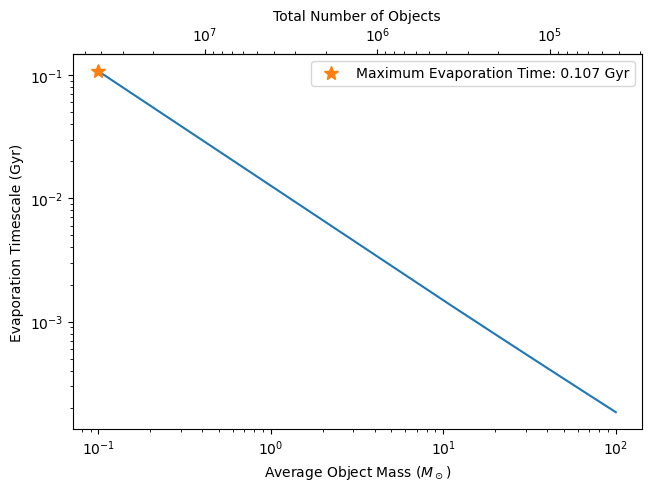

In [242]:
with quantity_support():
    fig, ax1 = plt.subplots(constrained_layout=True)

    ax1.plot(mass.to(u.M_sun).value, evap_plot.to(u.Gyr).value)
    ax1.set_yscale('log')
    ax1.set_ylabel('Evaporation Timescale (Gyr)')
    ax1.set_xlabel('Average Object Mass ($M_\odot$)')
    #ax1.set_xlim(0.1, 100)
    ax1.set_xscale('log')

    secax = ax1.secondary_xaxis('top', functions=(M2N, N2M))
    #secax.xaxis.set_minor_locator(AutoMinorLocator())
    #secax.set_xscale('log')
    secax.set_xlabel('Total Number of Objects')
    
    ax1.plot(M.to(u.M_sun)/np.max(N_plot), np.max(evap_plot).to(u.Gyr), ls='', marker='*', markersize=10, label='Maximum Evaporation Time: {:.3f}'.format(np.max(evap_plot).to(u.Gyr)))
    
    plt.legend(loc = 'upper right')
    
    plt.savefig('HW6_2.png', dpi = 250)
    plt.show()

In [ ]:
print(np.max(evap_plot).to(u.Gyr))